In [ ]:
!git clone https://github.com/MrUnstoppable/MLLAB.git

Cloning into 'MLLAB'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 13 (delta 3), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (13/13), 5.52 KiB | 5.52 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
!mv MLLAB/* .

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d sachinpatel21/az-handwritten-alphabets-in-csv-format

100% 185M/185M [00:07<00:00, 32.8MB/s]
100% 185M/185M [00:07<00:00, 26.7MB/s]


In [ ]:
!unzip /content/az-handwritten-alphabets-in-csv-format.zip

Archive:  /content/az-handwritten-alphabets-in-csv-format.zip
  inflating: A_Z Handwritten Data.csv  
  inflating: A_Z Handwritten Data/A_Z Handwritten Data.csv  


In [ ]:
!kaggle datasets download -d mohneesh7/english-alphabets

 83% 10.0M/12.1M [00:01<00:00, 14.2MB/s]
100% 12.1M/12.1M [00:01<00:00, 10.5MB/s]


In [ ]:
!unzip /content/english-alphabets.zip -d /content/alphabets

Streaming output truncated to the last 5000 lines.
  inflating: /content/alphabets/english_alphabets/G/3428.jpg  
  inflating: /content/alphabets/english_alphabets/G/343.jpg  
  inflating: /content/alphabets/english_alphabets/G/3430.jpg  
  inflating: /content/alphabets/english_alphabets/G/3433.jpg  
  inflating: /content/alphabets/english_alphabets/G/358.jpg  
  inflating: /content/alphabets/english_alphabets/G/3635.jpg  
  inflating: /content/alphabets/english_alphabets/G/3654.jpg  
  inflating: /content/alphabets/english_alphabets/G/366.jpg  
  inflating: /content/alphabets/english_alphabets/G/3671.jpg  
  inflating: /content/alphabets/english_alphabets/G/3673.jpg  
  inflating: /content/alphabets/english_alphabets/G/368.jpg  
  inflating: /content/alphabets/english_alphabets/G/369.jpg  
  inflating: /content/alphabets/english_alphabets/G/373.jpg  
  inflating: /content/alphabets/english_alphabets/G/375.jpg  
  inflating: /content/alphabets/english_alphabets/G/379.jpg  
  inflating:

4/4 [==============================] - 0s 8ms/step
Epoch 0, [D loss: 0.6452299952507019, acc.: 43.359375%], [G loss: 0.3818379342556]
1/1 [==============================] - 0s 198ms/step


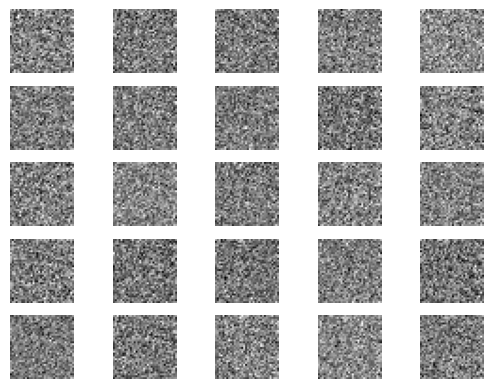

4/4 [==============================] - 0s 9ms/step
Epoch 1000, [D loss: 0.37779898941516876, acc.: 82.03125%], [G loss: 3.8040010929107666]
1/1 [==============================] - 0s 29ms/step


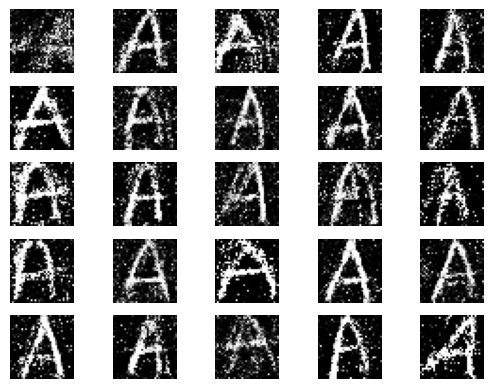

4/4 [==============================] - 0s 10ms/step
Epoch 2000, [D loss: 0.1294420212507248, acc.: 96.484375%], [G loss: 5.563514709472656]
1/1 [==============================] - 0s 32ms/step


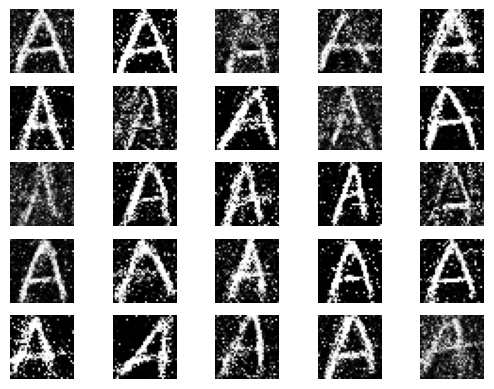

4/4 [==============================] - 0s 10ms/step
Epoch 3000, [D loss: 0.022884263657033443, acc.: 99.609375%], [G loss: 1.14504075050354]
1/1 [==============================] - 0s 24ms/step


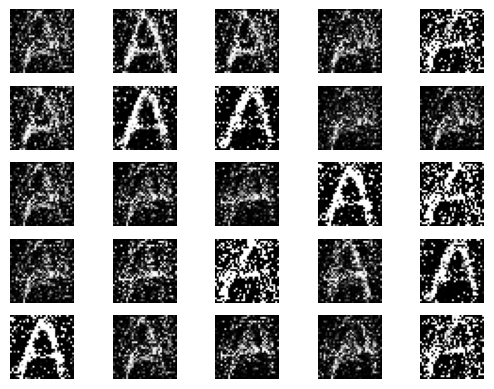

4/4 [==============================] - 0s 9ms/step
Epoch 4000, [D loss: 0.03055723663419485, acc.: 99.609375%], [G loss: 0.7326444387435913]
1/1 [==============================] - 0s 31ms/step


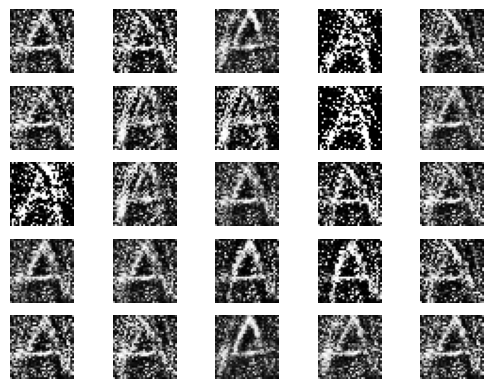

4/4 [==============================] - 0s 15ms/step
Epoch 5000, [D loss: 0.01862322771921754, acc.: 100.0%], [G loss: 0.44721707701683044]
1/1 [==============================] - 0s 41ms/step


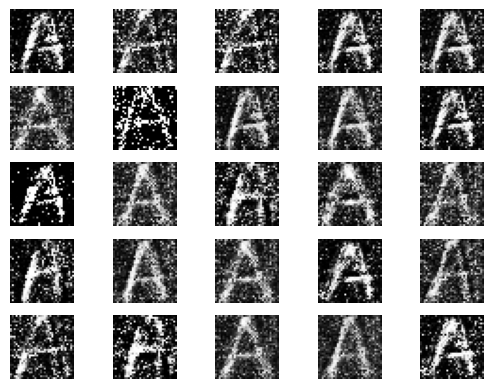

4/4 [==============================] - 0s 10ms/step
Epoch 6000, [D loss: 0.06323276087641716, acc.: 100.0%], [G loss: 1.1738455295562744]
1/1 [==============================] - 0s 25ms/step


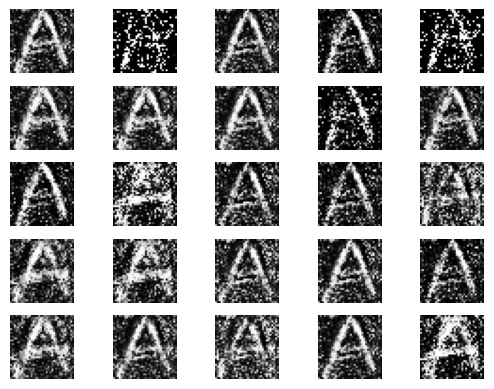

4/4 [==============================] - 0s 10ms/step
Epoch 7000, [D loss: 0.05903699994087219, acc.: 98.4375%], [G loss: 0.35175591707229614]
1/1 [==============================] - 0s 31ms/step


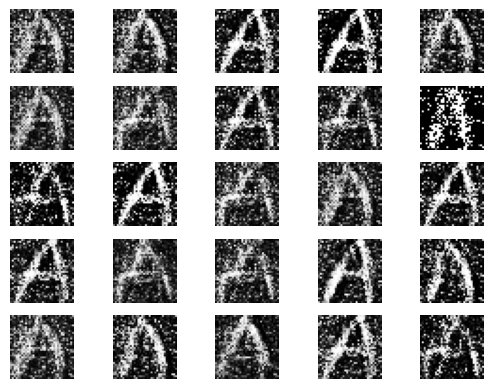

4/4 [==============================] - 0s 19ms/step
Epoch 8000, [D loss: 0.008019152679480612, acc.: 100.0%], [G loss: 0.5951917171478271]
1/1 [==============================] - 0s 41ms/step


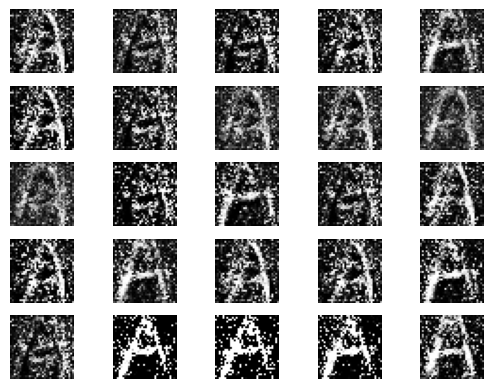

4/4 [==============================] - 0s 10ms/step
Epoch 9000, [D loss: 0.006262487266212702, acc.: 100.0%], [G loss: 0.25553321838378906]
1/1 [==============================] - 0s 40ms/step


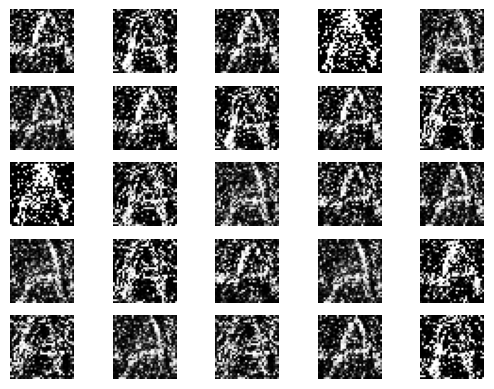

4/4 [==============================] - 0s 11ms/step


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, LeakyReLU, BatchNormalization, Flatten, Reshape, Input
from tensorflow.keras.optimizers import Adam

# Define the generator model
def build_generator():
    generator = Sequential([
        Dense(256, input_dim=100),
        LeakyReLU(0.2),
        BatchNormalization(),
        Dense(512),
        LeakyReLU(0.2),
        BatchNormalization(),
        Dense(1024),
        LeakyReLU(0.2),
        BatchNormalization(),
        Dense(1156, activation='tanh')  # Output dimension matches the flattened image size (34*34)
    ])
    noise = Input(shape=(100,))
    img = generator(noise)
    img = Reshape((34, 34))(img)  # Reshape to match the image size
    return Model(noise, img)

# Define the discriminator model
def build_discriminator():
    discriminator = Sequential([
        Flatten(input_shape=(34, 34)),  # Flatten the input image
        Dense(512),
        LeakyReLU(0.2),
        Dense(256),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    img = Input(shape=(34, 34))
    validity = discriminator(img)
    return Model(img, validity)

# Load your handwritten alphabet dataset and preprocess it
def load_dataset():
    data = []
    folder_path = 'alphabets'
    subfolder_path = os.path.join(folder_path, "A")
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            image_path = os.path.join(subfolder_path, filename)
            if os.path.isfile(image_path):
                image = Image.open(image_path).convert('L')  # Convert to grayscale if necessary
                image = image.resize((34, 34))  # Resize to match input size
                image = np.array(image)
                # Normalize the pixel values to the range [-1, 1]
                image = (image.astype(np.float32) - 127.5) / 127.5
                data.append(image)
    return np.array(data)

# Load your handwritten alphabet dataset
X_train = load_dataset()

# Compile both models
generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5), metrics=['accuracy'])

# Combined model
z = Input(shape=(100,))
img = generator(z)
discriminator.trainable = False
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

# Training parameters
batch_size = 128
epochs = 10000
sample_interval = 1000

# Training loop
for epoch in range(epochs):

    # Train discriminator
    idx = np.random.randint(0, X_train.shape[0], batch_size)
    imgs = X_train[idx]
    noise = np.random.normal(0, 1, (batch_size, 100))
    gen_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train generator
    noise = np.random.normal(0, 1, (batch_size, 100))
    valid_y = np.array([1] * batch_size)
    g_loss = combined.train_on_batch(noise, valid_y)

    # Print progress
    if epoch % sample_interval == 0:
        print(f"Epoch {epoch}, [D loss: {d_loss[0]}, acc.: {100*d_loss[1]}%], [G loss: {g_loss}]")

        # Generate sample images
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, 100))
        gen_imgs = generator.predict(noise)
        gen_imgs = 0.5 * gen_imgs + 0.5
        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i, j].imshow(gen_imgs[cnt], cmap='gray')  # Display the reshaped image
                axs[i, j].axis('off')
                cnt += 1
        plt.show()


1/1 [==============================] - 0s 26ms/step


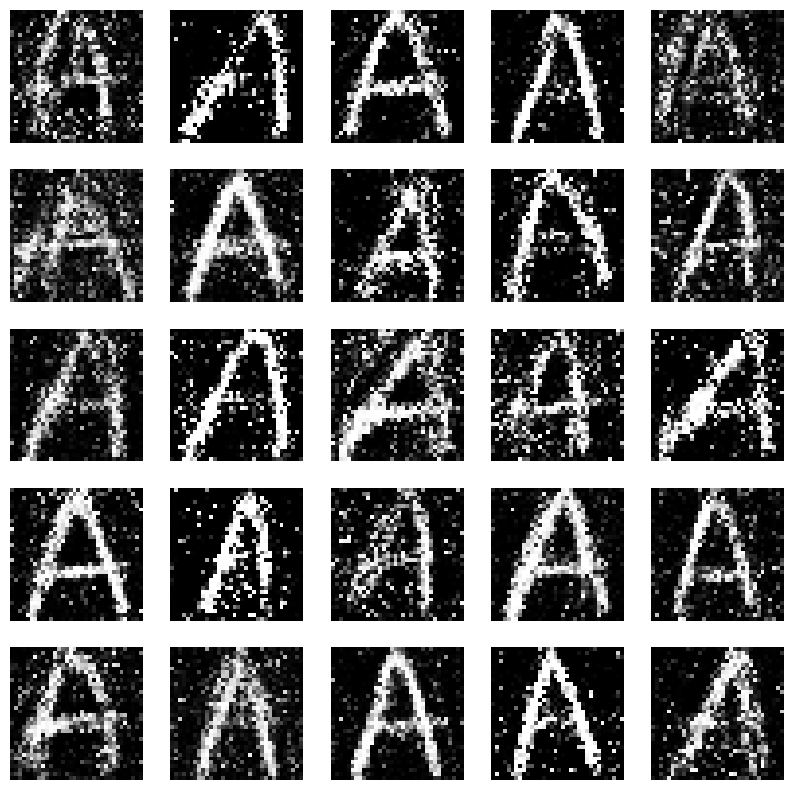

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate and visualize sample images
def generate_images(generator, rows, cols, noise_dim):
    noise = np.random.normal(0, 1, (rows * cols, noise_dim))
    gen_imgs = generator.predict(noise)
    gen_imgs = 0.5 * gen_imgs + 0.5  # Rescale images to [0, 1]

    fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
    cnt = 0
    for i in range(rows):
        for j in range(cols):
            axs[i,j].imshow(gen_imgs[cnt,:,:], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1
    plt.show()

# Generate sample images
rows, cols = 5, 5  # Number of rows and columns for the grid of images
noise_dim = 100  # Dimension of the input noise vector
generate_images(generator, rows, cols, noise_dim)
